In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import celltypist
import anndata as ad
from scipy import sparse
from anndata import AnnData

In [94]:
from matplotlib import colors

In [17]:
main_dir = "/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/merged_data/"

In [2]:
adata = sc.read(main_dir + "integration/dataset~integration_merged_data/method~scanvi/batch~batch,label~harmonized_anno,hyperparams~d453d7a675,lineage_key~None/adata.h5ad")

In [74]:
adata

AnnData object with n_obs × n_vars = 535908 × 2007
    obs: 'author_annotation', 'manual_celltype_annotation', 'batch', 'condition', 'timepoint', 'dataset', 'fibrotic/control', 'coarse_harmonized_anno', 'Phase', 'SAMP_stage', 'SC_prep', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_group', 'harmonized_anno', '_scvi_batch', '_scvi_labels', 'leiden_1_0'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'dataset', 'dataset_colors', 'hvg', 'integration', 'manual_celltype_annotation_colors', 'methods', 'neighbors', 'pca', 'umap'
    obsm: 'X_emb', 'X_umap', 'X_umap_embedded'
    varm: 'PCs'
    layers: 

# Scanvi

In [33]:
leiden_df = pd.read_csv(
    main_dir+ "integration/dataset~integration_merged_data/method~scanvi/batch~batch,label~harmonized_anno,hyperparams~d453d7a675,lineage_key~None/clusters_all_resolutions.tsv",
    sep='\t'
)

In [106]:
#adata_big = sc.read("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/complete_merged_public_and_galapagos_harmonized_doublet.h5ad")

In [41]:
leiden_df.index = leiden_df["Unnamed: 0"]

In [46]:
adata.obs["leiden_1_0"] = leiden_df["leiden_1.0_embed"].to_numpy()

In [12]:
umap_coo =  np.load("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/merged_data/integration/dataset~integration_merged_data/method~scanvi/batch~batch,label~harmonized_anno,hyperparams~d453d7a675,lineage_key~None/umap_coordinates.npy")


In [14]:
umap_coo.shape
#adata.obsm['X_umap_embedded'] = umap_coo
adata.obsm['X_umap'] = umap_coo

(535908, 2)

In [128]:
adata.obs["leiden_1_0"]= adata.obs["leiden_1_0"].astype("category")
adata.obs["harmonized_anno"]= adata.obs["harmonized_anno"].astype("category")

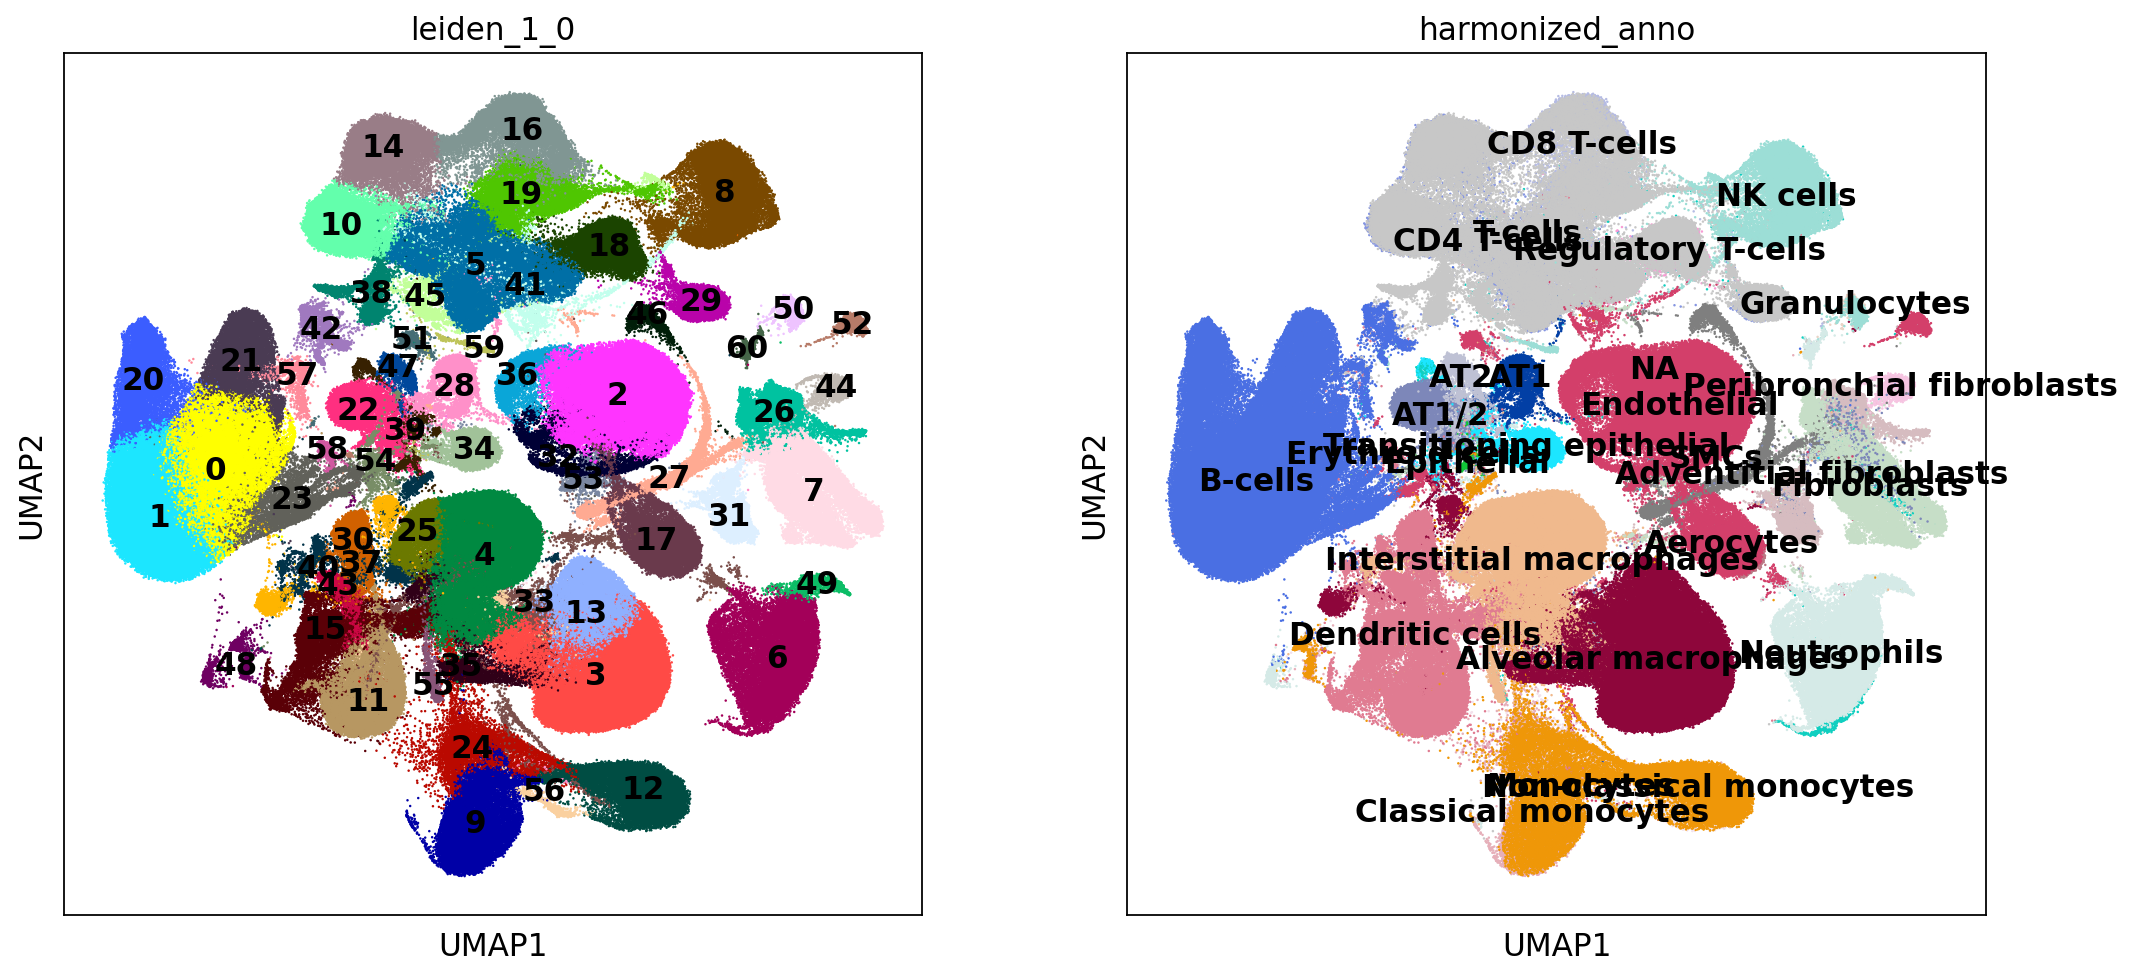

In [131]:
sc.set_figure_params(figsize=(7,7))
sc.pl.umap(adata, color =["leiden_1_0", "harmonized_anno"], legend_loc='on data', size=5)

In [115]:
all_marker_genes = {
  "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],
  "AT2": ["Muc1", "Sftpd", "Cxcl15", "Lcn2"],
  "Transitioning epithelial": ["Krt8", "Krt18"],
  "Epithelial": ["Epcam", "Cdh1"],
  "Alveolar macrophages": ["Marco", "Chil3", "Fabp4", "Il18", "Ear1", "Fabp1", "Car4", "Ctsk", "Chil3", "Wfdc21", "Itgam", "Cd36", "Gpnmb", "Bhlhe41"],
    #"Litaf", "Jund", "Bhlhe40" , "Atf3", "Atf4"
  "Interstitial macrophages": ["Trem2", "C1qa"],
  "Classical monocytes": ["F13a1", "Ly6c2"],
  "Non-classical monocytes": ["Treml4", "Fcgr3"],
  "Dendritic cells": [ "H2-Aa"],
  "Dendritic cells pDC": ["Siglech"],#  Clec4b1 instead of Clec4c   '['Clec4b1', 'Clec9a', 'Cspg4', 'Klf9', 'Lgr5', 'Lgr6', 'Plin2', 'S100a1', 'Sftpc', 'Siglecf']
  "Dendritic cells Ccr7-hi": ["Ccr7"],
  "CD4 T-cells": ["Cd4", "Cd3e", "Cd3d"],
  "CD8 T-cells": ["Cd8a", "Cd3d"],
  "NK cells": ["Tyrobp", "Gzma", "Nkg7"],
  "B-cells": ["Cd79a", "Cd19", "Ms4a1"],
  "Neutrophils": ["S100a8", "S100a9"],
  "Endothelial": ["Pecam1", "Ly6c1"], # Pecam1 instead of Pecam4
  "Lymphatic endothelial": ["Pdpn"],
  "Aerocytes": ["Car4", "Ednrb"],
  "Pericytes": ["Vtn", "Mcam"],
  "Lipofibroblasts": [ "Lpl", "Tcf21"],
  "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],
  "Alveolar fibroblast": ["Npnt", "Ces1d", "Slc7a10"],
  "Adventitial fibroblast": ["Pi16", "Dcn", "Il33", "Ccl11", "Adh7"],
  "Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18"],
  "SMCs": ["Acta2", "Tagln", "Myh11"]
}

In [139]:
adata.obs["leiden_1_0"] = adata.obs["leiden_1_0"].astype('category')
adata.obs["leiden_1_0"] = adata.obs["leiden_1_0"].map(str)

In [140]:
adata.obs["leiden_1_0"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'],
      dtype='object')

In [ ]:
sc.pl.dotplot(adata, all_marker_genes, groupby=["leiden_1_0"], standard_scale="var") # "dataset"


In [ ]:
# how to save a fig 
sc.set_figure_params(frameon=False, vector_friendly=True, fontsize=9)
sc.pl.umap(
    adata,
    color=cluster_cols,
    legend_loc='on data',
    ncols=2,
)
plt.savefig(output_file, bbox_inches='tight', dpi=200)

In [168]:
adata.obs["fibrotic/control"] = adata.obs["condition"].apply(lambda x: "control" if x == "untreated" or x == "saline" else "fibrotic")

In [ ]:
sc.set_figure_params(figsize=(10,10))

#sc.pl.umap(adata, color =["leiden_1_0", "harmonized_anno", "dataset", "batch", "condition"], size=5, ncols=1, palette=sc.pl.palettes.default_102, frameon=False)

sc.pl.umap(adata[adata.obs.sample(adata.n_obs).index], color =["leiden_1_0", "harmonized_anno", "dataset", "batch", "condition", "fibrotic/control"], size=5, ncols=1, palette=sc.pl.palettes.default_102, frameon=False)

In [ ]:
# SCVI 

In [148]:
adata_scvi = sc.read("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/merged_data/integration/dataset~integration_merged_data/method~scvi/batch~batch,label~harmonized_anno,hyperparams~d453d7a675,lineage_key~None/adata.h5ad")


In [149]:
umap_coo =  np.load("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/merged_data/integration/dataset~integration_merged_data/method~scvi/batch~batch,label~harmonized_anno,hyperparams~d453d7a675,lineage_key~None/umap_coordinates.npy")

In [150]:
adata_scvi.obsm['X_umap'] = umap_coo

In [151]:
leiden_df = pd.read_csv(
    main_dir+ "integration/dataset~integration_merged_data/method~scvi/batch~batch,label~harmonized_anno,hyperparams~d453d7a675,lineage_key~None/clusters_all_resolutions.tsv",
    sep='\t'
)

In [152]:
adata_scvi.obs["leiden_1_0"] = leiden_df["leiden_1.0_embed"].to_numpy()

In [154]:
adata_scvi.obs["leiden_1_0"] = adata_scvi.obs["leiden_1_0"].astype('category')
adata_scvi.obs["leiden_1_0"] = adata_scvi.obs["leiden_1_0"].map(str)

In [ ]:
sc.set_figure_params(figsize=(12,12))

sc.pl.umap(adata_scvi[adata_scvi.obs.sample(adata_scvi.n_obs).index], color =["leiden_1_0", "harmonized_anno", "dataset", "batch", "condition", "fibrotic/control"], size=5, ncols=1, palette=sc.pl.palettes.default_102, frameon=False)

In [165]:

adata_scvi.obs["fibrotic/control"] = adata_scvi.obs["condition"].apply(lambda x: "control" if x == "untreated" or x == "saline" else "fibrotic")

In [167]:
adata_scvi.obs["fibrotic/control"].value_counts()

fibrotic/control
fibrotic    304601
control     231307
Name: count, dtype: int64